In [1]:
#Start out with clearning dataet

#Show the dataframe

#Start with major percentages based on fraud/no fraud

#dive into card usage

#cond prob

#distance

#cross analysis

#For each section, flip back and forth with the tableau dashboard


In [5]:
#import atatements
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
#initially visualizing the dataset
df = pd.read_csv("card_transdata-checkpoint.csv")
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [9]:
#Cleaning out th rows containing NA/unwanted data entries
df = df.dropna(how='any')
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [37]:
df = df[((df['used_chip'] == 1)&(df['used_pin_number'] == 0)) | ((df['used_chip'] == 0)&(df['used_pin_number'] == 1))]
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
7,4.848247,0.320735,1.273050,1.0,0.0,1.0,0.0,0.0
10,14.263530,0.158758,1.136102,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999990,20.334489,11.437333,0.699527,1.0,1.0,0.0,1.0,0.0
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0


In [39]:
len(df[(df['used_pin_number'] == 0) & (df['used_chip'] == 0)].index)

0

In [25]:
df_fraud = df[df['fraud'] == 1]
usedchip_fraudper = len(df_fraud[df_fraud['used_chip'] == 1].index)/len(df_fraud.index)
usedchip_fraudper * 100

25.639852178986995

In [24]:
usedpin_fraudper = len(df_fraud[df_fraud['used_pin_number'] == 1].index)/len(df_fraud.index)
usedpin_fraudper * 100

0.31234625813759254

In [35]:
other_fraudper = len(df_fraud[(df_fraud['used_pin_number'] == 0) & (df_fraud['used_chip'] == 0)].index)/len(df_fraud.index)
other_fraudper

0.7405809869226456

Distance analysis for Distance From Home Column

In [ ]:
mean_DFH = df['distance_from_home'].mean()
print(mean_DFH)
df['is_fraud_and_far'] = (df['distance_from_home'] > mean_DFH) & (df['fraud'] == 1)

In [ ]:
df_DFH = pd.DataFrame()
df_DFH['lt 10'] = ((df['distance_from_home'] <= 10) & df['fraud']).value_counts()
df_DFH['10 to 20'] = ((10 < df['distance_from_home']) & (df['distance_from_home'] <= 20) & df['fraud']).value_counts()
df_DFH['20 to 30'] = ((20 < df['distance_from_home']) & (df['distance_from_home'] <= 30) & df['fraud']).value_counts()
df_DFH['30 to 40'] = ((30 < df['distance_from_home']) & (df['distance_from_home'] <= 40) & df['fraud']).value_counts()
df_DFH['40 to 50'] = ((40 < df['distance_from_home']) & (df['distance_from_home'] <= 50) & df['fraud']).value_counts()
df_DFH['50 to 60'] = ((50 < df['distance_from_home']) & (df['distance_from_home'] <= 60) & df['fraud']).value_counts()
df_DFH['60 to 70'] = ((60 < df['distance_from_home']) & (df['distance_from_home'] <= 70) & df['fraud']).value_counts()
df_DFH['70 to 80'] = ((70 < df['distance_from_home']) & (df['distance_from_home'] <= 80) & df['fraud']).value_counts()
df_DFH['80 to 90'] = ((80 < df['distance_from_home']) & (df['distance_from_home'] <= 90) & df['fraud']).value_counts()
df_DFH['90 to 100'] = ((90 < df['distance_from_home']) & (df['distance_from_home'] <= 100) & df['fraud']).value_counts()
df_DFH['gt 100'] = ((df['distance_from_home'] > 100) & df['fraud']).value_counts()
df_DFH

In [ ]:
percent_fraud_far = (df['is_fraud_and_far'].sum()/df.shape[0]) * 100
print(percent_fraud_far)
percent_fraud_close = ((len(df) - df['is_fraud_and_far'].sum())/df.shape[0]) * 100
print(percent_fraud_close)

Distance analysis for Distance From Last Transaction Column

In [2]:
mean_DFLT = df['distance_from_last_transaction'].mean()
print(mean_DFLT)
df['is_fraud_and_far_LT'] = (df['distance_from_last_transaction'] > mean_DFLT) & (df['fraud'] == 1)
df['is_fraud_and_far_LT'].value_counts()

NameError: name 'df' is not defined

In [ ]:
df_DFLT = pd.DataFrame()
df_DFLT['lt 10'] = ((df['distance_from_last_transaction'] <= 10) & df['fraud']).value_counts()
df_DFLT['10 to 20'] = ((10 < df['distance_from_last_transaction']) & (df['distance_from_last_transaction'] <= 20) & df['fraud']).value_counts()
df_DFLT['20 to 30'] = ((20 < df['distance_from_last_transaction']) & (df['distance_from_last_transaction'] <= 30) & df['fraud']).value_counts()
df_DFLT['30 to 40'] = ((30 < df['distance_from_last_transaction']) & (df['distance_from_last_transaction'] <= 40) & df['fraud']).value_counts()
df_DFLT['40 to 50'] = ((40 < df['distance_from_last_transaction']) & (df['distance_from_last_transaction'] <= 50) & df['fraud']).value_counts()
df_DFLT['50 to 60'] = ((50 < df['distance_from_last_transaction']) & (df['distance_from_last_transaction'] <= 60) & df['fraud']).value_counts()
df_DFLT['60 to 70'] = ((60 < df['distance_from_last_transaction']) & (df['distance_from_last_transaction'] <= 70) & df['fraud']).value_counts()
df_DFLT['70 to 80'] = ((70 < df['distance_from_last_transaction']) & (df['distance_from_last_transaction'] <= 80) & df['fraud']).value_counts()
df_DFLT['80 to 90'] = ((80 < df['distance_from_last_transaction']) & (df['distance_from_last_transaction'] <= 90) & df['fraud']).value_counts()
df_DFLT['90 to 100'] = ((90 < df['distance_from_last_transaction']) & (df['distance_from_last_transaction'] <= 100) & df['fraud']).value_counts()
df_DFLT['gt 100'] = ((df['distance_from_last_transaction'] > 100) & df['fraud']).value_counts()
df_DFLT

In [ ]:
percent_fraud_far_LT = (df['is_fraud_and_far_LT'].sum()/df.shape[0]) * 100
print(percent_fraud_far_LT)
percent_fraud_close_LT = ((len(df) - df['import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("card_transdata.csv")
df = df[((df["used_chip"] == 0) & (df["used_pin_number"] == 0) == False)].reset_index()
df.head()

round(df.corr(), 4)

df["fraud"].plot.hist()

def conditional(col):
    copy = df.copy()
    copy[col] = copy[col].astype(int).astype(str)
    copy["fraud"] = copy["fraud"].astype(int).astype(str)
    table = pd.crosstab(copy["fraud"], copy[col]).divide(copy[col].value_counts())
    return round(table, 3)

df["medianDistanceHome"] = df["distance_from_home"] >= df["distance_from_home"].median()
df["medianDistanceTransaction"] = df["distance_from_last_transaction"] >= df["distance_from_last_transaction"].median()
df["medianPriceRatio"] = df["ratio_to_median_purchase_price"] >= df["ratio_to_median_purchase_price"].median()

columns = ["repeat_retailer", "used_chip", "used_pin_number", "online_order", "medianDistanceHome", "medianDistanceTransaction", "medianPriceRatio"]
for c in columns:
    table = conditional(c)
    print(table)
    print("\n")
    table.to_csv(f"{c}_conditional.csv")

import math
import scipy.stats as stats

def two_proportion_z_test(x1, n1, x2, n2):
    p1 = x1 / n1
    p2 = x2 / n2

    p_combined = (x1 + x2) / (n1 + n2)
    standard_error = math.sqrt(p_combined * (1 - p_combined) * ((1 / n1) + (1 / n2)))

    z_score = (p1 - p2) / standard_error

    # Calculate the p-value
    p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))  # Two-tailed test

    return p_value



#p_value = two_proportion_z_test(x1, n1, x2, n2)
#print("p-value:", p_value)

Testing Two-proportion z for each column.

H0: There is no difference in fraud rate for usage of each metric.
HA: There is a difference ... non-usage.

def z_test(item):
    xYes = len(df[(df[item] == 1) & (df["fraud"] == 1)])
    nYes = len(df[df[item] == 1])

    # no chip
    xNo = len(df[(df[item] == 0) & (df["fraud"] == 1)])
    nNo = len(df[df[item] == 0])
    return two_proportion_z_test(xYes, nYes, xNo, nNo)

for c in columns:
    print(f"z_test for {c} on fraud prediction: p-value = {round(z_test(c), 4)}")

import math
import scipy.stats as stats

def two_proportion_z_test_relative_risk(x1, n1, x2, n2):
    p1 = x1 / n1
    p2 = x2 / n2

    relative_risk = p1 / p2

    standard_error = math.sqrt(((1 - p1) / (n1 * p1)) + ((1 - p2) / (n2 * p2)))

    z_score = math.log(relative_risk) / standard_error

    # Calculate the p-value
    p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))  # Two-tailed test

    return p_value

def rr_test(item):
    xYes = len(df[(df[item] == 1) & (df["fraud"] == 1)])
    nYes = len(df[df[item] == 1])

    # no chip
    xNo = len(df[(df[item] == 0) & (df["fraud"] == 1)])
    nNo = len(df[df[item] == 0])
    return two_proportion_z_test_relative_risk(xYes, nYes, xNo, nNo)

for c in columns:
    print(f"z_test RR for {c} on fraud prediction: p-value = {round(z_test(c), 4)}")

## Confidence intervals:

def ci95(item):
    xYes = len(df[(df[item] == 1) & (df["fraud"] == 1)])
    nYes = len(df[df[item] == 1])

    xNo = len(df[(df[item] == 0) & (df["fraud"] == 1)])
    nNo = len(df[df[item] == 0])
    
    RR = (xYes/nYes)/(xNo/nNo)
    SE = math.sqrt(((nYes - xYes)/xYes) / nYes + ((nNo - xNo)/xNo) / nNo)
    left = min(math.log(RR)/math.log(math.e) + 1.96*SE, math.log(RR)/math.log(math.e) - 1.96*SE)
    right = max(math.log(RR)/math.log(math.e) + 1.96*SE, math.log(RR)/math.log(math.e) - 1.96*SE)
    return (round(math.exp(left), 2), round(math.exp(right), 2))

for c in columns:
    print(f"95% CI for {c}: {ci95(c)}")is_fraud_and_far_LT'].sum())/df.shape[0]) * 100
print(percent_fraud_close_LT)

# Sucheen's Code
#### Analysis 1

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("card_transdata.csv")
df = df[((df["used_chip"] == 0) & (df["used_pin_number"] == 0) == False)].reset_index()
df.head()

,index,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
2,4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
3,7,4.848247,0.320735,1.273050,1.0,0.0,1.0,0.0,0.0
4,10,14.263530,0.158758,1.136102,1.0,1.0,0.0,1.0,0.0


In [12]:
round(df.corr(), 4)

,index,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
index,1.0000,-0.0028,0.0024,0.0018,-0.0014,0.0032,-0.0037,-0.0030,0.0021
distance_from_home,-0.0028,1.0000,-0.0003,-0.0030,0.1463,0.0017,-0.0018,0.0002,0.0257
distance_from_last_transaction,0.0024,-0.0003,1.0000,0.0019,0.0003,0.0025,-0.0020,0.0023,0.0322
ratio_to_median_purchase_price,0.0018,-0.0030,0.0019,1.0000,0.0023,0.0008,0.0013,-0.0032,0.4902
repeat_retailer,-0.0014,0.1463,0.0003,0.0023,1.0000,-0.0021,-0.0002,0.0010,-0.0050
used_chip,0.0032,0.0017,0.0025,0.0008,-0.0021,1.0000,-0.7658,-0.0010,0.0962
used_pin_number,-0.0037,-0.0018,-0.0020,0.0013,-0.0002,-0.7658,1.0000,-0.0006,-0.1289
online_order,-0.0030,0.0002,0.0023,-0.0032,0.0010,-0.0010,-0.0006,1.0000,0.1579
fraud,0.0021,0.0257,0.0322,0.4902,-0.0050,0.0962,-0.1289,0.1579,1.0000


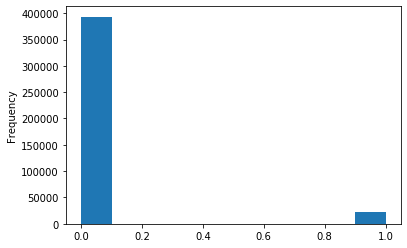

In [13]:
df["fraud"].plot.hist()

In [14]:
def conditional(col):
    copy = df.copy()
    copy[col] = copy[col].astype(int).astype(str)
    copy["fraud"] = copy["fraud"].astype(int).astype(str)
    table = pd.crosstab(copy["fraud"], copy[col]).divide(copy[col].value_counts())
    return round(table, 3)

In [15]:
df["medianDistanceHome"] = df["distance_from_home"] >= df["distance_from_home"].median()
df["medianDistanceTransaction"] = df["distance_from_last_transaction"] >= df["distance_from_last_transaction"].median()
df["medianPriceRatio"] = df["ratio_to_median_purchase_price"] >= df["ratio_to_median_purchase_price"].median()

columns = ["repeat_retailer", "used_chip", "used_pin_number", "online_order", "medianDistanceHome", "medianDistanceTransaction", "medianPriceRatio"]
for c in columns:
    table = conditional(c)
    print(table)
    print("\n")
    table.to_csv(f"{c}_conditional.csv")

           0      1
fraud              
0      0.942  0.946
1      0.058  0.054


           0      1
fraud              
0      0.996  0.936
1      0.004  0.064


used_pin_number      0      1
fraud                        
0                0.929  0.997
1                0.071  0.003


           0      1
fraud              
0      0.994  0.919
1      0.006  0.081


           0      1
fraud              
0      0.946  0.945
1      0.054  0.055


           0      1
fraud              
0      0.947  0.944
1      0.053  0.056


           0      1
fraud              
0      0.999  0.892
1      0.001  0.108




In [16]:
import math
import scipy.stats as stats

def two_proportion_z_test(x1, n1, x2, n2):
    p1 = x1 / n1
    p2 = x2 / n2

    p_combined = (x1 + x2) / (n1 + n2)
    standard_error = math.sqrt(p_combined * (1 - p_combined) * ((1 / n1) + (1 / n2)))

    z_score = (p1 - p2) / standard_error

    # Calculate the p-value
    p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))  # Two-tailed test

    return p_value



#p_value = two_proportion_z_test(x1, n1, x2, n2)
#print("p-value:", p_value)

Testing Two-proportion z for each column.

H0: There is no difference in fraud rate for usage of each metric.
HA: There is a difference ... non-usage.

In [17]:
def z_test(item):
    xYes = len(df[(df[item] == 1) & (df["fraud"] == 1)])
    nYes = len(df[df[item] == 1])

    # no chip
    xNo = len(df[(df[item] == 0) & (df["fraud"] == 1)])
    nNo = len(df[df[item] == 0])
    return two_proportion_z_test(xYes, nYes, xNo, nNo)

In [18]:
for c in columns:
    print(f"z_test for {c} on fraud prediction: p-value = {round(z_test(c), 4)}")

z_test for repeat_retailer on fraud prediction: p-value = 0.0011
z_test for used_chip on fraud prediction: p-value = 0.0
z_test for used_pin_number on fraud prediction: p-value = 0.0
z_test for online_order on fraud prediction: p-value = 0.0
z_test for medianDistanceHome on fraud prediction: p-value = 0.2189
z_test for medianDistanceTransaction on fraud prediction: p-value = 0.0
z_test for medianPriceRatio on fraud prediction: p-value = 0.0


In [19]:
import math
import scipy.stats as stats

def two_proportion_z_test_relative_risk(x1, n1, x2, n2):
    p1 = x1 / n1
    p2 = x2 / n2

    relative_risk = p1 / p2

    standard_error = math.sqrt(((1 - p1) / (n1 * p1)) + ((1 - p2) / (n2 * p2)))

    z_score = math.log(relative_risk) / standard_error

    # Calculate the p-value
    p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))  # Two-tailed test

    return p_value

In [20]:
def rr_test(item):
    xYes = len(df[(df[item] == 1) & (df["fraud"] == 1)])
    nYes = len(df[df[item] == 1])

    # no chip
    xNo = len(df[(df[item] == 0) & (df["fraud"] == 1)])
    nNo = len(df[df[item] == 0])
    return two_proportion_z_test_relative_risk(xYes, nYes, xNo, nNo)

In [21]:
for c in columns:
    print(f"z_test RR for {c} on fraud prediction: p-value = {round(z_test(c), 4)}")

z_test RR for repeat_retailer on fraud prediction: p-value = 0.0011
z_test RR for used_chip on fraud prediction: p-value = 0.0
z_test RR for used_pin_number on fraud prediction: p-value = 0.0
z_test RR for online_order on fraud prediction: p-value = 0.0
z_test RR for medianDistanceHome on fraud prediction: p-value = 0.2189
z_test RR for medianDistanceTransaction on fraud prediction: p-value = 0.0
z_test RR for medianPriceRatio on fraud prediction: p-value = 0.0


## Confidence intervals:

In [28]:
def ci95(item):
    xYes = len(df[(df[item] == 1) & (df["fraud"] == 1)])
    nYes = len(df[df[item] == 1])

    xNo = len(df[(df[item] == 0) & (df["fraud"] == 1)])
    nNo = len(df[df[item] == 0])
    
    RR = (xYes/nYes)/(xNo/nNo)
    SE = math.sqrt(((nYes - xYes)/xYes) / nYes + ((nNo - xNo)/xNo) / nNo)
    left = min(math.log(RR)/math.log(math.e) + 1.96*SE, math.log(RR)/math.log(math.e) - 1.96*SE)
    right = max(math.log(RR)/math.log(math.e) + 1.96*SE, math.log(RR)/math.log(math.e) - 1.96*SE)
    return (round(math.exp(left), 2), round(math.exp(right), 2))

In [29]:
for c in columns:
    print(f"95% CI for {c}: {ci95(c)}")

95% CI for repeat_retailer: (0.9, 0.98)
95% CI for used_chip: (14.07, 17.92)
95% CI for used_pin_number: (0.03, 0.04)
95% CI for online_order: (13.5, 15.52)
95% CI for medianDistanceHome: (0.99, 1.04)
95% CI for medianDistanceTransaction: (1.05, 1.1)
95% CI for medianPriceRatio: (71.34, 90.31)


### Analysis 2

In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import interpolate
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("chargeback_frauds.csv").drop("Unnamed: 0", axis=1)
df.head()

,Card Number,Date,Amount,CBK
0,536518******2108,2015-05-01 00:01:54,36.54,No
1,536518******2108,2015-05-01 00:03:46,36.54,No
2,453211******1239,2015-05-01 00:08:50,69.00,No
3,548827******1705,2015-05-01 00:27:00,193.43,No
4,531681******9778,2015-05-01 01:32:46,132.00,No


In [111]:
df.dtypes

Card Number     object
Date            object
Amount         float64
CBK             object
dtype: object

In [112]:
df["Date"] = pd.to_datetime(df["Date"])
df["CBK Num"] = df["CBK"].apply(lambda cbk: int(cbk == "Yes"))

Text(0.5, 0, 'Chargeback?')

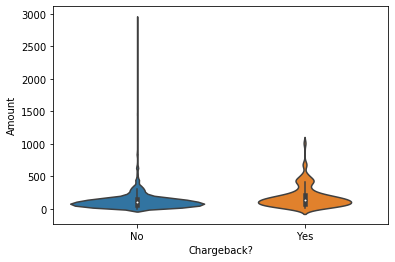

In [113]:
sns.violinplot(data=df, x="CBK", y="Amount")
plt.xlabel("Chargeback?")

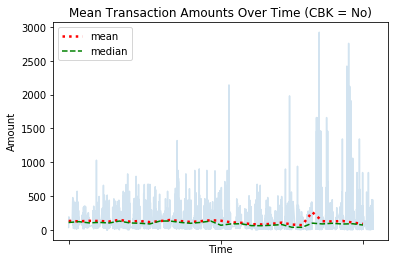

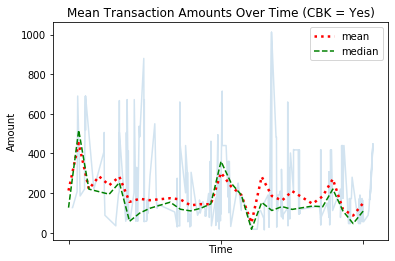

In [131]:
for cbk in df["CBK"].unique():
    copy = df[df["CBK"] == cbk]
    
    copy["Day"] = copy["Date"].astype(str).apply(lambda d: d.split(" ")[0])
    copy["Day"] = pd.to_datetime(copy["Day"])
    means = copy.groupby("Day")["Amount"].mean()
    medians = copy.groupby("Day")["Amount"].median()

    x = copy["Day"]
    y = copy["Amount"]

    x = means.index
    custom_ticks = [x[0], x[len(x)//2], x[-1]]
    custom_tick_labels = [str(x[0]), '', str(x[-1])]

    x = copy["Date"]
    plt.plot(x, y, alpha=0.2)
    plt.plot(means.index, means, color="red", linewidth=2.5, label = "mean", linestyle = "dotted")
    plt.plot(medians.index, medians, color="green", linestyle="dashed", label = "median")
    plt.legend()
    plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=False)
    plt.xticks(custom_ticks, custom_tick_labels)
    plt.xlabel("Time")
    plt.ylabel("Amount")
    plt.title(f"Mean Transaction Amounts Over Time (CBK = {cbk})")
    plt.show()

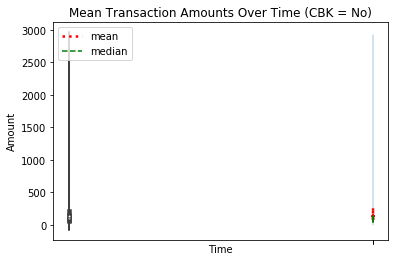

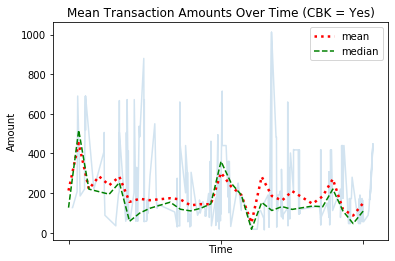

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import interpolate
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("chargeback_frauds.csv").drop("Unnamed: 0", axis=1)
df.head()

df.dtypes

df["Date"] = pd.to_datetime(df["Date"])
df["CBK Num"] = df["CBK"].apply(lambda cbk: int(cbk == "Yes"))

sns.violinplot(data=df, x="CBK", y="Amount")
plt.xlabel("Chargeback?")

for cbk in df["CBK"].unique():
    copy = df[df["CBK"] == cbk]
    
    copy["Day"] = copy["Date"].astype(str).apply(lambda d: d.split(" ")[0])
    copy["Day"] = pd.to_datetime(copy["Day"])
    means = copy.groupby("Day")["Amount"].mean()
    medians = copy.groupby("Day")["Amount"].median()

    x = copy["Day"]
    y = copy["Amount"]

    x = means.index
    custom_ticks = [x[0], x[len(x)//2], x[-1]]
    custom_tick_labels = [str(x[0]), '', str(x[-1])]

    x = copy["Date"]
    plt.plot(x, y, alpha=0.2)
    plt.plot(means.index, means, color="red", linewidth=2.5, label = "mean", linestyle = "dotted")
    plt.plot(medians.index, medians, color="green", linestyle="dashed", label = "median")
    plt.legend()
    plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=False)
    plt.xticks(custom_ticks, custom_tick_labels)
    plt.xlabel("Time")
    plt.ylabel("Amount")
    plt.title(f"Mean Transaction Amounts Over Time (CBK = {cbk})")
    plt.show()

# test_file-Somya
### with sucheen's conditional probability function

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('card_transdata.csv')

In [3]:
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [4]:
df['big_dist'] = df['distance_from_home'] > 50
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud,big_dist
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0,True
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0,False
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0,False
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0,False
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0,False
...,...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0,False
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0,False
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0,False
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0,False


In [5]:
df['is_fraud_big_dist'] = (df['big_dist'] is True) and (fraud == 1)
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud,big_dist,is_fraud_big_dist
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0,True,False
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0,False,False
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0,False,False
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0,False,False
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0,False,False
...,...,...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0,False,False
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0,False,False
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0,False,False
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0,False,False


In [6]:
df['is_fraud_small_dist'] = (df['big_dist'] is False) and (fraud == 1)
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud,big_dist,is_fraud_big_dist,is_fraud_small_dist
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0,True,False,False
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0,False,False,False
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0,False,False,False
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0,False,False,False
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0,False,False,False
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0,False,False,False
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0,False,False,False
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0,False,False,False


In [7]:
del df['is_fraud_small_dist']

In [8]:
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud,big_dist,is_fraud_big_dist
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0,True,False
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0,False,False
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0,False,False
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0,False,False
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0,False,False
...,...,...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0,False,False
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0,False,False
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0,False,False
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0,False,False


In [9]:
df['is_chip_fraud'] = (df['used_chip'] == 1) == (df['fraud'] == 1)
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud,big_dist,is_fraud_big_dist,is_chip_fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0,True,False,False
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0,False,False,True
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0,False,False,True
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0,False,False,False
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0,False,False,False
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0,False,False,False
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0,False,False,False
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0,False,False,True


In [10]:
df['is_pin_fraud'] = (df['used_pin_number'] == 1) == (df['fraud'] == 1)
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud,big_dist,is_fraud_big_dist,is_chip_fraud,is_pin_fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0,True,False,False,True
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0,False,False,True,True
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0,False,False,True,True
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0,False,False,False,True
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0,False,False,False,True
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0,False,False,False,True
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0,False,False,False,True
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0,False,False,True,True


In [11]:
df['is_online_fraud'] = (df['online_order'] == 1) == (df['fraud'] == 1)
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud,big_dist,is_fraud_big_dist,is_chip_fraud,is_pin_fraud,is_online_fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0,True,False,False,True,True
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0,False,False,True,True,True
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0,False,False,True,True,False
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0,False,False,False,True,False
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0,False,False,False,True,True
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0,False,False,False,True,True
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0,False,False,False,True,False
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0,False,False,True,True,False


In [12]:
percent_fraud_online = (df['is_online_fraud'].sum()/df.shape[0]) * 100
print(percent_fraud_online)

42.7467


In [13]:
percent_fraud_chip = (df['is_chip_fraud'].sum()/df.shape[0]) * 100
print(percent_fraud_chip)

60.70179999999999


In [14]:
percent_fraud_pin = (df['is_pin_fraud'].sum()/df.shape[0]) * 100
print(percent_fraud_pin)

81.2535


In [15]:
mean_DFH = df['distance_from_home'].mean()
print(mean_DFH)

26.628792192572483


In [16]:
df['is_fraud_and_far'] = (df['distance_from_home'] > mean_DFH) & (df['fraud'] == 1)
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud,big_dist,is_fraud_big_dist,is_chip_fraud,is_pin_fraud,is_online_fraud,is_fraud_and_far
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0,True,False,False,True,True,False
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0,False,False,True,True,True,False
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0,False,False,True,True,False,False
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0,False,False,False,True,False,False
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0,False,False,False,True,True,False
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0,False,False,False,True,True,False
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0,False,False,False,True,False,False
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0,False,False,True,True,False,False


In [17]:
df['is_fraud_and_far'].value_counts()

False    965126
True      34874
Name: is_fraud_and_far, dtype: int64

In [18]:
percent_fraud_far = (df['is_fraud_and_far'].sum()/df.shape[0]) * 100
print(percent_fraud_far)

3.4874


In [19]:
percent_fraud_close = ((len(df) - df['is_fraud_and_far'].sum())/df.shape[0]) * 100
print(percent_fraud_close)

96.5126


In [20]:
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud,big_dist,is_fraud_big_dist,is_chip_fraud,is_pin_fraud,is_online_fraud,is_fraud_and_far
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0,True,False,False,True,True,False
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0,False,False,True,True,True,False
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0,False,False,True,True,False,False
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0,False,False,False,True,False,False
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0,False,False,False,True,True,False
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0,False,False,False,True,True,False
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0,False,False,False,True,False,False
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0,False,False,True,True,False,False


In [21]:
((df['distance_from_home'] <= 10) & df['fraud']).value_counts()

False    964241
True      35759
dtype: int64

In [22]:
((10 < df['distance_from_home']) & (df['distance_from_home'] <= 20) & df['fraud']).value_counts()

False    987651
True      12349
dtype: int64

In [23]:
((20 < df['distance_from_home']) & (df['distance_from_home'] <= 30) & df['fraud']).value_counts()

False    993906
True       6094
dtype: int64

In [24]:
((30 < df['distance_from_home']) & (df['distance_from_home'] <= 40) & df['fraud']).value_counts()

False    996293
True       3707
dtype: int64

In [25]:
((40 < df['distance_from_home']) & (df['distance_from_home'] <= 50) & df['fraud']).value_counts()

False    997645
True       2355
dtype: int64

In [26]:
((50 < df['distance_from_home']) & (df['distance_from_home'] <= 60) & df['fraud']).value_counts()

False    998383
True       1617
dtype: int64

In [27]:
((60 < df['distance_from_home']) & (df['distance_from_home'] <= 70) & df['fraud']).value_counts()

False    998781
True       1219
dtype: int64

In [28]:
((70 < df['distance_from_home']) & (df['distance_from_home'] <= 80) & df['fraud']).value_counts()

False    999103
True        897
dtype: int64

In [29]:
((80 < df['distance_from_home']) & (df['distance_from_home'] <= 90) & df['fraud']).value_counts()

False    999341
True        659
dtype: int64

In [30]:
((90 < df['distance_from_home']) & (df['distance_from_home'] <= 100) & df['fraud']).value_counts()

False    999460
True        540
dtype: int64

In [31]:
((df['distance_from_home'] > 100) & df['fraud']).value_counts()

False    977793
True      22207
dtype: int64

In [32]:
df_dc = pd.DataFrame()

In [33]:
df_dc['lt_10'] = ((df['distance_from_home'] <= 10) & df['fraud']).value_counts()

In [34]:
df_dc['10_to_20'] = ((10 < df['distance_from_home']) & (df['distance_from_home'] <= 20) & df['fraud']).value_counts()

In [35]:
df_dc['20 to 30'] = ((20 < df['distance_from_home']) & (df['distance_from_home'] <= 30) & df['fraud']).value_counts()

In [36]:
df_dc['30 to 40'] = ((30 < df['distance_from_home']) & (df['distance_from_home'] <= 40) & df['fraud']).value_counts()

In [37]:
df_dc['40 to 50'] = ((40 < df['distance_from_home']) & (df['distance_from_home'] <= 50) & df['fraud']).value_counts()

In [38]:
df_dc['50 to 60'] = ((50 < df['distance_from_home']) & (df['distance_from_home'] <= 60) & df['fraud']).value_counts()

In [39]:
df_dc['60 to 70'] = ((60 < df['distance_from_home']) & (df['distance_from_home'] <= 70) & df['fraud']).value_counts()

In [40]:
df_dc['70 to 80'] = ((70 < df['distance_from_home']) & (df['distance_from_home'] <= 80) & df['fraud']).value_counts()

In [41]:
df_dc['80 to 90'] = ((80 < df['distance_from_home']) & (df['distance_from_home'] <= 90) & df['fraud']).value_counts()

In [42]:
df_dc['90 to 100'] = ((90 < df['distance_from_home']) & (df['distance_from_home'] <= 100) & df['fraud']).value_counts()

In [43]:
df_dc['gt 100'] = ((df['distance_from_home'] > 100) & df['fraud']).value_counts()

In [44]:
df_dc

,lt_10,10_to_20,20 to 30,30 to 40,40 to 50,50 to 60,60 to 70,70 to 80,80 to 90,90 to 100,gt 100
False,964241,987651,993906,996293,997645,998383,998781,999103,999341,999460,977793
True,35759,12349,6094,3707,2355,1617,1219,897,659,540,22207


In [45]:
df_dc.to_csv("DFH_intervals.csv")

In [46]:
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud,big_dist,is_fraud_big_dist,is_chip_fraud,is_pin_fraud,is_online_fraud,is_fraud_and_far
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0,True,False,False,True,True,False
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0,False,False,True,True,True,False
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0,False,False,True,True,False,False
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0,False,False,False,True,False,False
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0,False,False,False,True,True,False
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0,False,False,False,True,True,False
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0,False,False,False,True,False,False
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0,False,False,True,True,False,False


In [47]:
mean_DFLT = df['distance_from_last_transaction'].mean()
print(mean_DFLT)

5.036519397861659


In [48]:
df['is_fraud_and_far_LT'] = (df['distance_from_last_transaction'] > mean_DFLT) & (df['fraud'] == 1)
df['is_fraud_and_far_LT'].value_counts()

False    979259
True      20741
Name: is_fraud_and_far_LT, dtype: int64

In [49]:
percent_fraud_far_LT = (df['is_fraud_and_far_LT'].sum()/df.shape[0]) * 100
print(percent_fraud_far_LT)
percent_fraud_close_LT = ((len(df) - df['is_fraud_and_far_LT'].sum())/df.shape[0]) * 100
print(percent_fraud_close_LT)

2.0741
97.9259


In [50]:
df_dc_LT = pd.DataFrame()
df_dc_LT['lt 10'] = ((df['distance_from_last_transaction'] <= 10) & df['fraud']).value_counts()
df_dc_LT['10 to 20'] = ((10 < df['distance_from_last_transaction']) & (df['distance_from_last_transaction'] <= 20) & df['fraud']).value_counts()
df_dc_LT['20 to 30'] = ((20 < df['distance_from_last_transaction']) & (df['distance_from_last_transaction'] <= 30) & df['fraud']).value_counts()
df_dc_LT['30 to 40'] = ((30 < df['distance_from_last_transaction']) & (df['distance_from_last_transaction'] <= 40) & df['fraud']).value_counts()
df_dc_LT['40 to 50'] = ((40 < df['distance_from_last_transaction']) & (df['distance_from_last_transaction'] <= 50) & df['fraud']).value_counts()
df_dc_LT['50 to 60'] = ((50 < df['distance_from_last_transaction']) & (df['distance_from_last_transaction'] <= 60) & df['fraud']).value_counts()
df_dc_LT['60 to 70'] = ((60 < df['distance_from_last_transaction']) & (df['distance_from_last_transaction'] <= 70) & df['fraud']).value_counts()
df_dc_LT['70 to 80'] = ((70 < df['distance_from_last_transaction']) & (df['distance_from_last_transaction'] <= 80) & df['fraud']).value_counts()
df_dc_LT['80 to 90'] = ((80 < df['distance_from_last_transaction']) & (df['distance_from_last_transaction'] <= 90) & df['fraud']).value_counts()
df_dc_LT['90 to 100'] = ((90 < df['distance_from_last_transaction']) & (df['distance_from_last_transaction'] <= 100) & df['fraud']).value_counts()
df_dc_LT['gt 100'] = ((df['distance_from_last_transaction'] > 100) & df['fraud']).value_counts()
df_dc_LT

,lt 10,10 to 20,20 to 30,30 to 40,40 to 50,50 to 60,60 to 70,70 to 80,80 to 90,90 to 100,gt 100
False,926670,995687,998507,999294,999559,998352,998871,999247,999418,999530,997462
True,73330,4313,1493,706,441,1648,1129,753,582,470,2538


In [51]:
df_dc_LT.to_csv("DFLT_intervals.csv")

## Conditional Probability for Distance to Home

###### sucheen's code

In [52]:
def conditional(col, data = df):
    copy = data.copy()
    copy[col] = copy[col].astype(int).astype(str)
    copy["fraud"] = copy["fraud"].astype(int).astype(str)
    table = pd.crosstab(copy["fraud"], copy[col]).divide(copy[col].value_counts())
    return round(table, 3)

In [53]:
conditional("big_dist")

big_dist,0,1
fraud,,
0,0.931,0.783
1,0.069,0.217


In [54]:
df['lt 10'] = ((df['distance_from_last_transaction'] <= 10))
df['10 to 20'] = ((10 < df['distance_from_last_transaction']) & (df['distance_from_last_transaction'] <= 20))
df['20 to 30'] = ((20 < df['distance_from_last_transaction']) & (df['distance_from_last_transaction'] <= 30))
df['30 to 40'] = ((30 < df['distance_from_last_transaction']) & (df['distance_from_last_transaction'] <= 40))
df['40 to 50'] = ((40 < df['distance_from_last_transaction']) & (df['distance_from_last_transaction'] <= 50))
df['50 to 60'] = ((50 < df['distance_from_last_transaction']) & (df['distance_from_last_transaction'] <= 60))
df['60 to 70'] = ((60 < df['distance_from_last_transaction']) & (df['distance_from_last_transaction'] <= 70))
df['70 to 80'] = ((70 < df['distance_from_last_transaction']) & (df['distance_from_last_transaction'] <= 80))
df['80 to 90'] = ((80 < df['distance_from_last_transaction']) & (df['distance_from_last_transaction'] <= 90))
df['90 to 100'] = ((90 < df['distance_from_last_transaction']) & (df['distance_from_last_transaction'] <= 100))
df['gt 100'] = ((df['distance_from_last_transaction'] > 100))
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud,big_dist,is_fraud_big_dist,...,10 to 20,20 to 30,30 to 40,40 to 50,50 to 60,60 to 70,70 to 80,80 to 90,90 to 100,gt 100
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0,True,False,...,False,False,False,False,False,False,False,False,False,False
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0,False,False,...,False,False,False,False,False,False,False,False,False,False


In [55]:
# conditional
for colName in df_dc_LT.columns:
    table = conditional(colName, df)
    print(table)
    print("\n\n\n")
    table.to_csv(f"{colName}_conditional.csv")

           0      1
fraud              
0      0.859  0.919
1      0.141  0.081




10 to 20      0      1
fraud                 
0         0.912  0.918
1         0.088  0.082




20 to 30      0      1
fraud                 
0         0.912  0.919
1         0.088  0.081




30 to 40      0      1
fraud                 
0         0.913  0.922
1         0.087  0.078




40 to 50      0      1
fraud                 
0         0.913  0.916
1         0.087  0.084




50 to 60      0      1
fraud                 
0         0.914  0.511
1         0.086  0.489




60 to 70      0      1
fraud                 
0         0.914  0.523
1         0.086  0.477




70 to 80      0      1
fraud                 
0         0.913  0.551
1         0.087  0.449




80 to 90      0     1
fraud                
0         0.913  0.51
1         0.087  0.49




90 to 100      0      1
fraud                  
0          0.913  0.517
1          0.087  0.483




gt 100      0      1
fraud               
0       0.